# Link to source code

https://github.com/juliafairbank7/juliafairbank7.github.io/blob/main/posts/perceptron-blog-post/perceptron.py

# Overview of Perceptron Model

The Peceptron Algorithm is a binary, linear classification machine learning algorithm. The algorithms aims to find a rule that separates two distinct groups in some data.

The algorithm takes in a vector of n data points that have k features as input and predicts a label by calculating the weighted sum of the inputs and a bias b, and predicts 1 if positive and 0 if negative. 

The perceptron algorithm aims to find a good (not always the best) $\tilde{w}$ using the following algorithm:

1. Begin with some random $\tilde{w}^{(0)}$
2. "Until we're done" in some time-step t:
    - Pick a random data point i within the n data points
    - Compute $\hat{y}_{i}^{(t)} =  \langle \tilde{w}^{(t)}, \tilde{x}_{i} \rangle$
    - If $\hat{y}_{i}^{(t)}{y}_{i}$ > 0, then point is correctly classified – pass!
    - If $\hat{y}_{i}^{(t)}{y}_{i}$ < 0, then perform the update: 
    
    $$
        \tilde{w}^{(t+1)} = \tilde{w}^{(t)} + {y}_i \tilde{w}_{i}
       $$

In order to actually separate the two classes, the algorithm uses the prediction function which follows the rule: $  \langle \tilde{w}^{(1)}, \tilde{w}_{(i)} \rangle \lt 0 \iff {y}_i = 1 $, 

which says that if the dot product between $\tilde{w}^{(1)}$ and $\tilde{w}_{(i)}$ is less than 0, label it 1, otherwise label it -1. 

Let's see how my perceptron algorithm works on a set of data. 

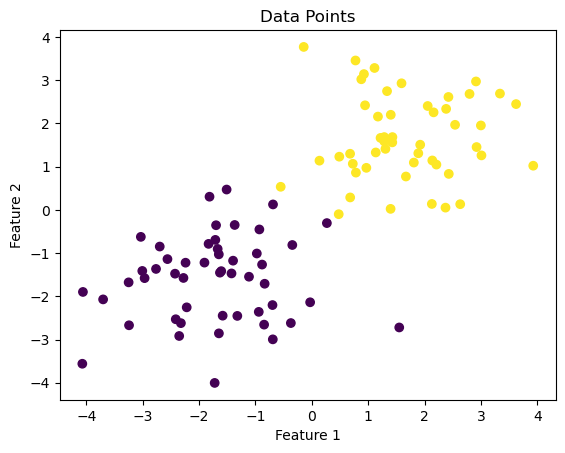

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.datasets import make_blobs

np.random.seed(12345)

n = 100
p_features = 3

X, y = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7), (1.7, 1.7)])

fig = plt.scatter(X[:,0], X[:,1], c = y)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")
title = plt.gca().set(title = "Data Points")

# Applying the fit() method

Perceptron.fit(X, y) is my primary method. When p.fit(X, y) is called, p should have an instance variable of weights called w. This w is the vector in the classifier above. Additionally, p should have an instance variable called p.history which is a list of the evolution of the score over the training period. 

Within the fit() function, we perform the perceptron update that correspondes to Equation 1, which states:

$$
\tilde{w}^{(t+1)} = \tilde{w}^{(t)} + \mathbb1 (\tilde{y}_i \langle \tilde{w}^{(t)}, \tilde{w}_{(i)} \rangle \lt 0)  \tilde{y}_i \tilde{x}_i
$$


# applying the predict() method

Perceptron.predict(X) returns a vector of predicted labels on the data using the function 
$$  \langle \tilde{w}^{(1)}, \tilde{w}_{(i)} \rangle \lt 0 \iff {y}_i = 1 
$$

See the linear classification below that separates the two classes. 

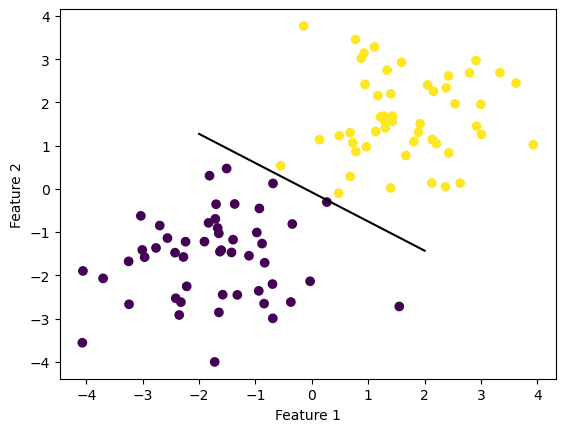

In [21]:
from perceptron import Perceptron

p = Perceptron()
p.fit(X, y, max_steps=1000)

def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

fig = plt.scatter(X[:,0], X[:,1], c = y)
fig = draw_line(p.w_hat, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

#p.score(X, y)

# applying the score() method

Perceptron.score(X, y) returns the accuracy of the perceptron as a number between 0 and 1, with 1 corresponding to perfect classification. We can see how the algorithm updates through different accuracies/losses, then ultimately converges to 0 with a perfect classification. The algorithm converges at a loss of 0 when it has successfully located a hyperplane that perfectly separates the two classes. 

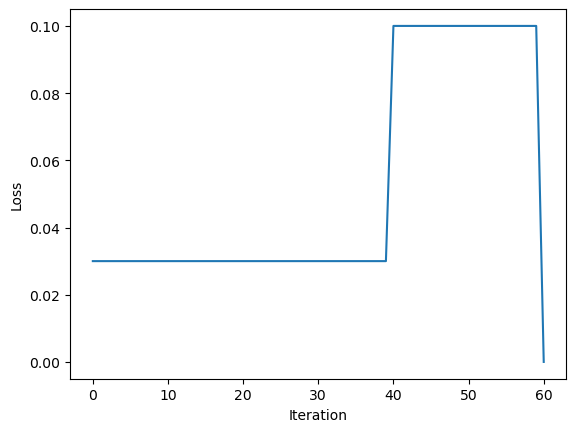

In [22]:
# import Perceptron from source.py
from perceptron import Perceptron

p = Perceptron()
p.fit(X, y, max_steps=1000)

fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

However, this algorithm only converges when the data is lineraly separable, meaning there exists some line that separates the two classes. So let's take a look at a nonlineraly separable dataset to see how the algorithm responds. 

# non-lineraly separable data

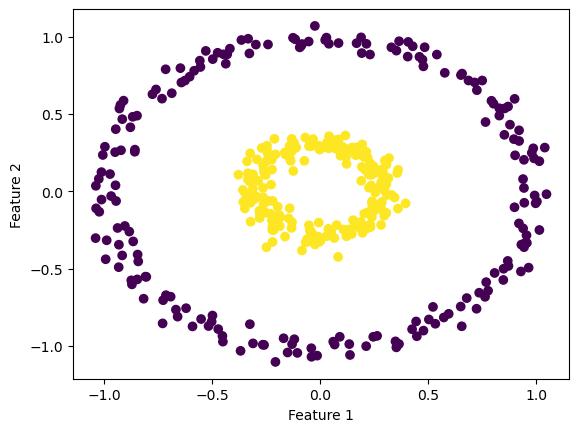

In [23]:
from sklearn.datasets import make_circles

X_c, y_c = make_circles(n_samples=400, factor=.3, noise=.05)

fig = plt.scatter(X_c[:,0], X_c[:,1], c = y_c)
xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")

As you can see from this datset, there is no straight line that could separate the two classes, making this a nonlinearly separable dataset. Let's see how the perceptron algorithm fits this data and where it draws the hyperplane.

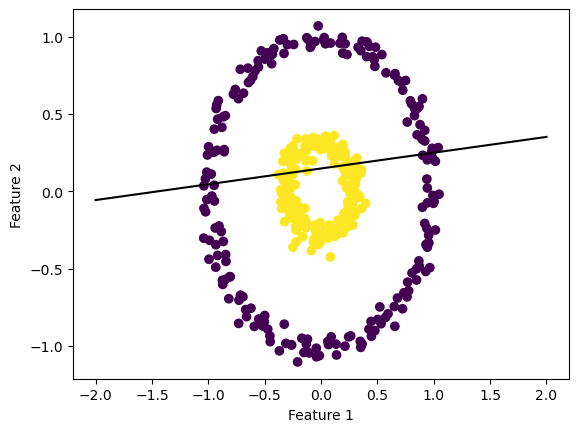

In [24]:
p = Perceptron()
p.fit(X_c, y_c, max_steps=1000)

def draw_line(w, x_min, x_max):
    x = np.linspace(x_min, x_max, 101)
    y = -(w[0]*x + w[2])/w[1]
    plt.plot(x, y, color = "black")

fig = plt.scatter(X_c[:,0], X_c[:,1], c = y_c)
fig = draw_line(p.w_hat, -2, 2)

xlab = plt.xlabel("Feature 1")
ylab = plt.ylabel("Feature 2")


As you can see, the line drawn by the algorithm does not perfectly separate the two classes. Let's look at the loss history graph to see the different updates.

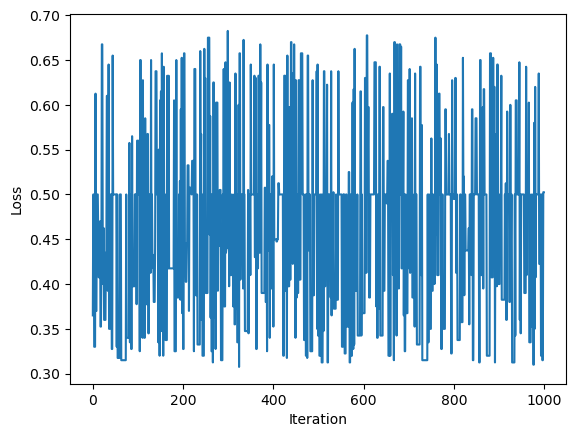

In [25]:
p = Perceptron()
p.fit(X_c, y_c, max_steps=1000)

fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

As you can see in the graph above, the algorithm never converges to 0, proving that the algorithm does not work on non-linearly separable datasets. 

Next, let's see how the algorithm handles datasets with higher dimensions. 

# 5-Dimension Data

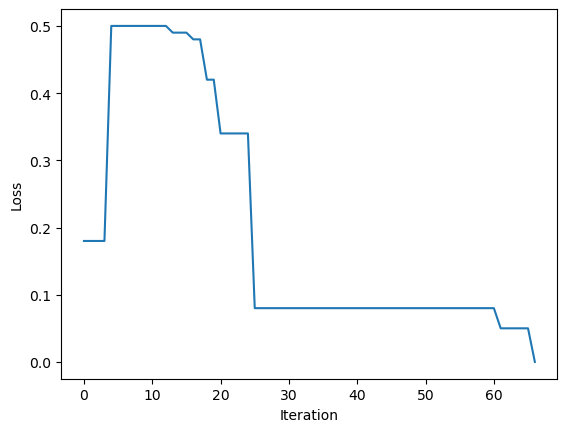

In [26]:
np.random.seed(12345)

n = 100
p_features = 5

X_5, y_5 = make_blobs(n_samples = 100, n_features = p_features - 1, centers = [(-1.7, -1.7, -3, 4, 1), (1.7, 1.7, 1, 53, 5)])

p = Perceptron()
p.fit(X_5, y_5, max_steps=1000)

fig = plt.plot(p.history)
xlab = plt.xlabel("Iteration")
ylab = plt.ylabel("Loss")

As you can see in this loss history graph, the algorithm converges to 0 around iteration 65. Because the algorithm eventually has a loss of 0, this means there exists a hyperplane that perfectly separates the two classes. So, the perceptron algorithm works on multi-dimensional data, as long as it is lineraly separable. 

# run-time complexity()

For the update function,

$$
        \tilde{w}^{(t+1)} = \tilde{w}^{(t)} + {y}_i \tilde{w}_{i}
       $$
       
the run-time complexity of one iteration would be ${p}^2$, so it only depends on the number of features, ${p}$, and doesn't depend on the number of datapoints, ${n}$. 